# Содержание
1. Описание проекта
2. Предлагаемое решение

# 1. Описание проекта

Тут будет описание проекта

# 2. Предлагаемое решение

Тут будет описание решения

# 3. Общие настройки

## 3.1. Импорт библиотек

In [15]:
# Общие библиотеки
import os

# Математические расчёты
import numpy as np
import pandas as pd

# Поиск аномалий
import pyod

# Модели поиска аномалий
from pyod.models.knn import KNN

## 3.2. Глобальные параметры

In [6]:
# Для тестирования
contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

# 4. Выгрузка данных

In [7]:
X_train, X_test, y_train, y_test = pyod.utils.data.generate_data(
    n_train=n_train, n_test=n_test, contamination=contamination
)

# 5. Разведочный анализ

# 6. Обучение моделей

In [16]:
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# it is possible to get the prediction confidence as well
y_test_pred, y_test_pred_confidence = clf.predict(X_test, return_confidence=True)  # outlier labels (0 or 1) and confidence in the range of [0,1]

In [20]:
from pyod.utils.data import evaluate_print
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
KNN ROC:0.9992, precision @ rank n:0.95

On Test Data:
KNN ROC:1.0, precision @ rank n:1.0


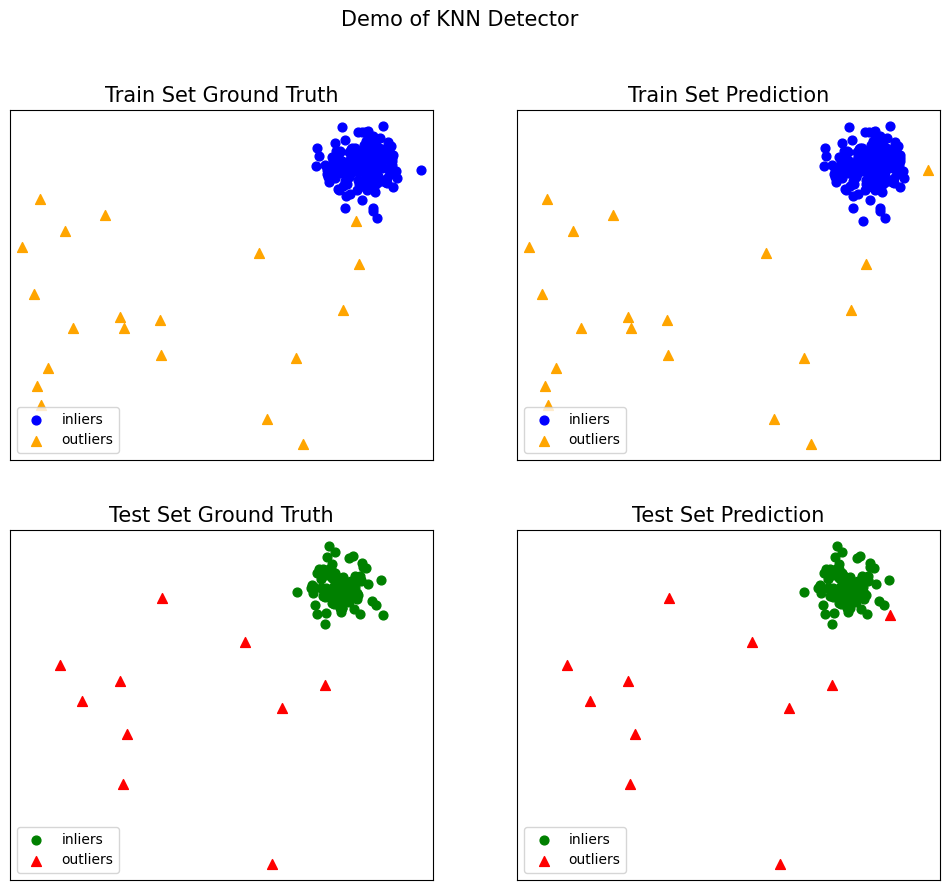

In [23]:
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

In [22]:
from pyod.utils.example import visualize

Number of inliers: 150
Number of outliers: 50
Ground truth shape is (200,). Outlier are 1 and inliers are 0.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 

Model 1 Angle-based Outlier Detector (ABOD)
Model 2 K Nearest Neighbors (KNN)
Model 3 Average KNN
Model 4 Median KNN
Model 5 Local Outlier Factor (LOF)
Model 6 Isolation Forest

1 fitting Angle-based Outlier Detector (ABOD)

2 fitting K Nearest Neighbors (KNN)

3 fitting Average KNN

4 fitting Median KNN

5 fitting Local Outlier Factor (LOF)

6 fitting Isolation Forest


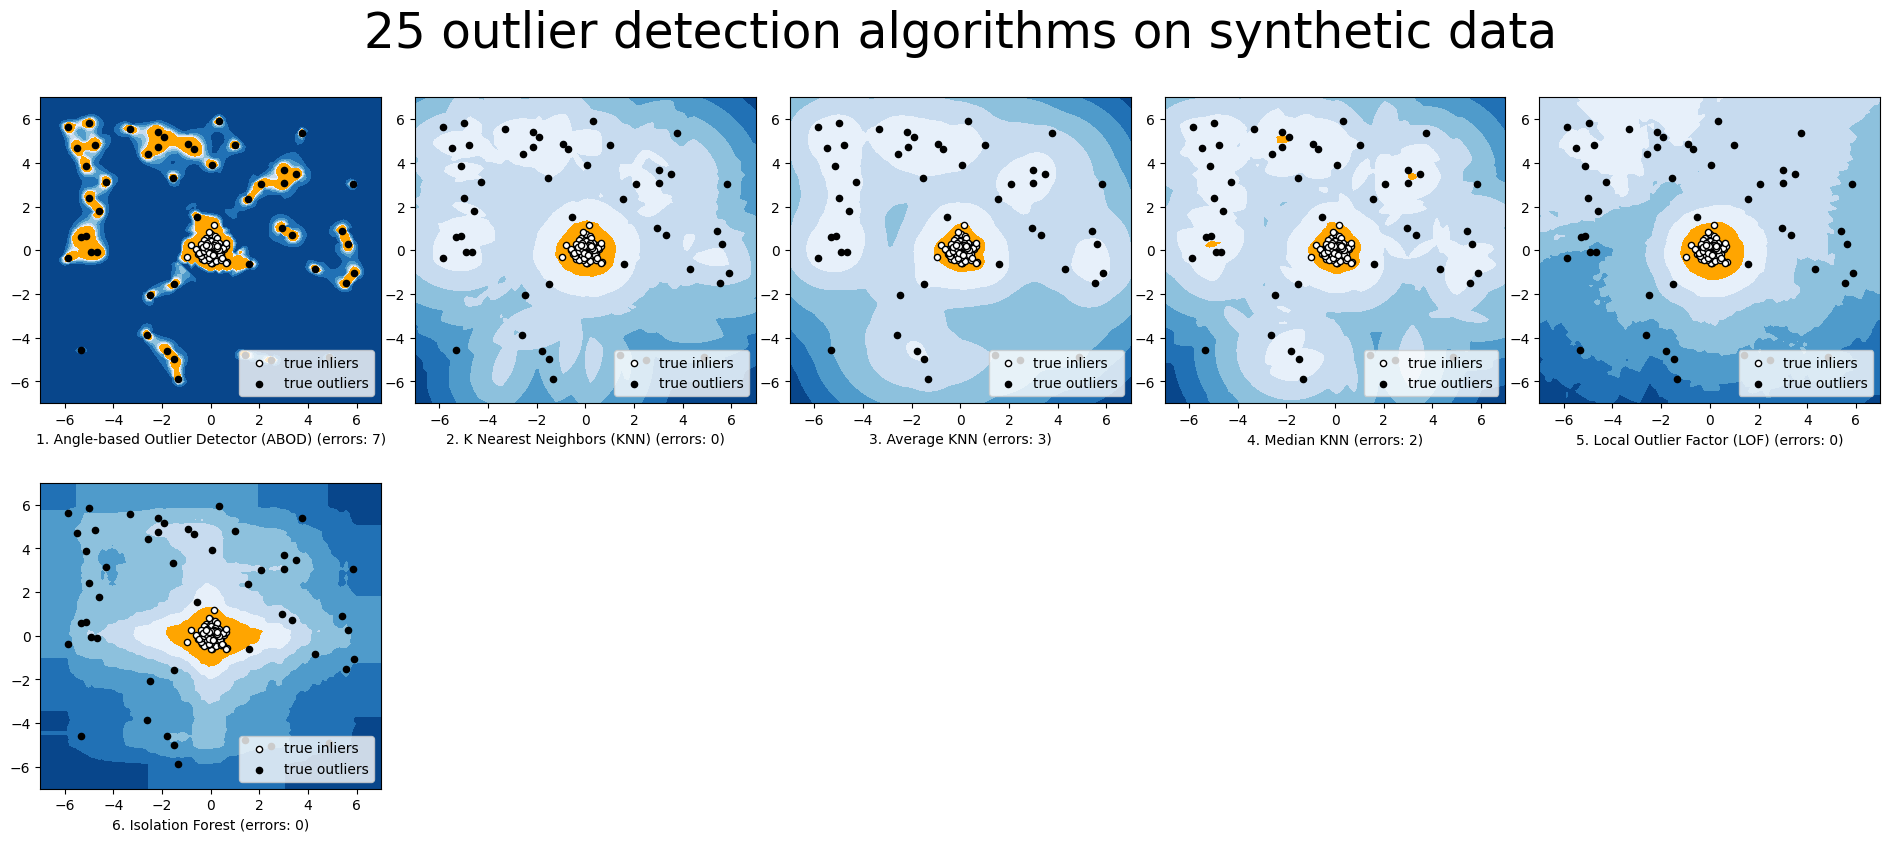

In [27]:
from __future__ import division
from __future__ import print_function

import os
import sys

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
	os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

# supress warnings for clean output
import warnings

warnings.filterwarnings("ignore")
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import matplotlib.font_manager

# Import all models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP
from pyod.models.inne import INNE
from pyod.models.gmm import GMM
from pyod.models.kde import KDE
from pyod.models.lmdd import LMDD

# from pyod.models.dif import DIF
# from pyod.models.copod import COPOD
# from pyod.models.ecod import ECOD
# from pyod.models.suod import SUOD
# from pyod.models.qmcd import QMCD
# from pyod.models.sampling import Sampling
# from pyod.models.kpca import KPCA
# from pyod.models.lunar import LUNAR

# TODO: add neural networks, LOCI, SOS, COF, SOD

# Define the number of inliers and outliers
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0]

# Compare given detectors under given settings
# Initialize the data
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

# initialize a set of detectors for LSCP
detector_list = [LOF(n_neighbors=5), LOF(n_neighbors=10), LOF(n_neighbors=15),
				 LOF(n_neighbors=20), LOF(n_neighbors=25), LOF(n_neighbors=30),
				 LOF(n_neighbors=35), LOF(n_neighbors=40), LOF(n_neighbors=45),
				 LOF(n_neighbors=50)]

# Show the statics of the data
print('Number of inliers: %i' % n_inliers)
print('Number of outliers: %i' % n_outliers)
print(
	'Ground truth shape is {shape}. Outlier are 1 and inliers are 0.\n'.format(
		shape=ground_truth.shape))
print(ground_truth, '\n')

random_state = 42
# Define nine outlier detection tools to be compared
classifiers = {
	'Angle-based Outlier Detector (ABOD)':
		ABOD(contamination=outliers_fraction),
	'K Nearest Neighbors (KNN)': KNN(
		contamination=outliers_fraction),
	'Average KNN': KNN(method='mean',
					   contamination=outliers_fraction),
	'Median KNN': KNN(method='median',
					  contamination=outliers_fraction),
	'Local Outlier Factor (LOF)':
		LOF(n_neighbors=35, contamination=outliers_fraction),

	'Isolation Forest': IForest(contamination=outliers_fraction,
								random_state=random_state),
	# 'Deep Isolation Forest (DIF)': DIF(contamination=outliers_fraction,
	# 								   random_state=random_state),
	# 'INNE': INNE(
	# 	max_samples=2, contamination=outliers_fraction,
	# 	random_state=random_state,
	# ),

	# 'Locally Selective Combination (LSCP)': LSCP(
	# 	detector_list, contamination=outliers_fraction,
	# 	random_state=random_state),
	# 'Feature Bagging':
	# 	FeatureBagging(LOF(n_neighbors=35),
	# 				   contamination=outliers_fraction,
	# 				   random_state=random_state),
	# 'SUOD': SUOD(contamination=outliers_fraction),

	# 'Minimum Covariance Determinant (MCD)': MCD(
	# 	contamination=outliers_fraction, random_state=random_state),

	# 'Principal Component Analysis (PCA)': PCA(
	# 	contamination=outliers_fraction, random_state=random_state),
	# 'KPCA': KPCA(
	# 	contamination=outliers_fraction),

	# 'Probabilistic Mixture Modeling (GMM)': GMM(contamination=outliers_fraction,
	# 											random_state=random_state),

	# 'LMDD': LMDD(contamination=outliers_fraction,
	# 			 random_state=random_state),

	# 'Histogram-based Outlier Detection (HBOS)': HBOS(
	# 	contamination=outliers_fraction),

	# 'Copula-base Outlier Detection (COPOD)': COPOD(
	# 	contamination=outliers_fraction),

	# 'ECDF-baseD Outlier Detection (ECOD)': ECOD(
	# 	contamination=outliers_fraction),
	# 'Kernel Density Functions (KDE)': KDE(contamination=outliers_fraction),

	# 'QMCD': QMCD(
	# 	contamination=outliers_fraction),

	# 'Sampling': Sampling(
	# 	contamination=outliers_fraction),

	# 'LUNAR': LUNAR(),

	# 'Cluster-based Local Outlier Factor (CBLOF)':
	# 	CBLOF(contamination=outliers_fraction,
	# 		  check_estimator=False, random_state=random_state),

	# 'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction),
}

# Show all detectors
for i, clf in enumerate(classifiers.keys()):
	print('Model', i + 1, clf)

# Fit the models with the generated data and
# compare model performances
for i, offset in enumerate(clusters_separation):
	np.random.seed(42)
	# Data generation
	X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
	X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
	X = np.r_[X1, X2]
	# Add outliers
	X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]

	# Fit the model
	plt.figure(figsize=(20, 22))
	for i, (clf_name, clf) in enumerate(classifiers.items()):
		print()
		print(i + 1, 'fitting', clf_name)
		# fit the data and tag outliers
		clf.fit(X)
		scores_pred = clf.decision_function(X) * -1
		y_pred = clf.predict(X)
		threshold = percentile(scores_pred, 100 * outliers_fraction)
		n_errors = (y_pred != ground_truth).sum()
		# plot the levels lines and the points

		Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
		Z = Z.reshape(xx.shape)
		subplot = plt.subplot(5, 5, i + 1)
		subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
						 cmap=plt.cm.Blues_r)
		# a = subplot.contour(xx, yy, Z, levels=[threshold],
		#                     linewidths=2, colors='red')
		subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
						 colors='orange')
		b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
							s=20, edgecolor='k')
		c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
							s=20, edgecolor='k')
		subplot.axis('tight')
		subplot.legend(
			[
				# a.collections[0],
				b, c],
			[
				# 'learned decision function',
				'true inliers', 'true outliers'],
			prop=matplotlib.font_manager.FontProperties(size=10),
			loc='lower right')
		subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
		subplot.set_xlim((-7, 7))
		subplot.set_ylim((-7, 7))
	plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
	plt.suptitle("25 outlier detection algorithms on synthetic data",
				 fontsize=35)
plt.savefig('ALL.png', dpi=300, bbox_inches='tight')
plt.show()